In [1]:
%pylab inline
from champ.sim import multiXC, multiXCGVP
from scipy.optimize import root_scalar

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [1]:
n = 10
x_arr = linspace(0,100,n)
z_arr = linspace(0,1,n)
sim = multiXC(x_arr,z_arr,0.1, init_radii=2.0)

NameError: name 'linspace' is not defined

In [28]:
h0 = sim.z_arr[0] + 0.5
hguess = h0+0.1
g=9.8
f=0.1
L = sim.x_arr[1] - sim.x_arr[0]
fd_down = h0 - sim.z_arr[0]
fd_guess = 0.40084796343254675# WSnew #hguess - sim.z_arr[1]
xc_up = sim.xcs[1]
xc_down = sim.xcs[0]



A_guess = xc_up.calcA(depth=fd_guess)
Pw_guess = xc_up.calcP(depth=fd_guess)
K_guess = A_guess * np.sqrt(2*g*(4*A_guess/Pw_guess)/f)
S_f_guess = sim.Q_w**2 / K_guess
h_e_guess = S_f_guess * L


A_down = xc_down.calcA(depth=fd_down)
Pw_down = xc_down.calcP(depth=fd_down)


V_down = sim.Q_w/A_down
V_up_guess = sim.Q_w/A_guess

V_head_down = V_down**2/(2*g)
V_head_up_guess = V_up_guess**2/(2*g)

fd_calc_from_guess = sim.z_arr[0] - sim.z_arr[1] + fd_down + V_head_down - V_head_up_guess + h_e_guess
fd_calc_from_guess

0.40084796343254675

In [20]:
WSnew = fd_guess + 0.7 * (fd_calc_from_guess - fd_guess)
WSnew

0.4248353727310991

-1.399990209518333

In [31]:
def fd_res(fd_guess):
    A_guess = xc_up.calcA(depth=fd_guess)
    Pw_guess = xc_up.calcP(depth=fd_guess)
    K_guess = A_guess * np.sqrt(2*g*(4*A_guess/Pw_guess)/f)
    # S_f_guess = sim.Q_w**2 / K_guess


    A_down = xc_down.calcA(depth=fd_down)
    Pw_down = xc_down.calcP(depth=fd_down)
    K_down = A_down * np.sqrt(2*g*(4*A_down/Pw_down)/f)

    S_f_guess = (2 * sim.Q_w / (K_down + K_guess) )**2
    h_e_guess = S_f_guess * L

    V_down = sim.Q_w/A_down
    V_up_guess = sim.Q_w/A_guess

    V_head_down = V_down**2/(2*g)
    V_head_up_guess = V_up_guess**2/(2*g)

    fd_calc_from_guess = sim.z_arr[0] - sim.z_arr[1] + fd_down + V_head_down - V_head_up_guess + h_e_guess
    return fd_guess - fd_calc_from_guess

In [34]:
sol = root_scalar(fd_res, x0=0.4, x1=0.45)

In [35]:
sol.root

0.3890728672941937

In [12]:
n = 10
x_arr = linspace(0,1000,n)
z_arr = linspace(0,5,n)
sim = multiXCGVP(x_arr,z_arr,0.1, init_radii=2.0)

In [3]:
sim.run_one_step()

/home/mcoving/anaconda3/lib/python3.9/site-packages/champ-0.2-py3.9-linux-x86_64.egg/champ/crossSection.py:366: RuntimeWarning: divide by zero encountered in double_scalars
  self.psi = g * self.eSlope / sum
/home/mcoving/anaconda3/lib/python3.9/site-packages/champ-0.2-py3.9-linux-x86_64.egg/champ/crossSection.py:341: RuntimeWarning: invalid value encountered in multiply
  self.T_b = psi * rho_w * Awet * vgrad2


In [13]:
sim.calc_flow()

IndexError: index 0 is out of bounds for axis 0 with size 0

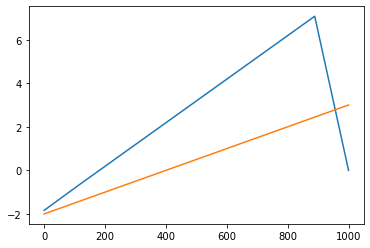

In [14]:
plot(sim.x_arr, sim.h)
plot(sim.x_arr, sim.z_arr)

In [11]:
sim.xcs[1].eSlope

7.688804915842009e-05